# Heart Attack Risk Analysis
By : Himnish Sambaraju, Gourav Saigal, Ady Yang

Contribution Checkpoints:\
**Member 1: Himnish Sambaraju,** Contribution: 90% (did not contribute to G).

**Member 2: Gourav Saigal,** Contribution: 75% (did not contribute to D).

**Member 3: Ady Yang,** Contribution: 90% (did not contribute to B).

We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.

Himnish Sambaraju: 5/7/24\
Gourav Saigal: 5/7/24\
Ady Yang: 5/7/24


**Himnish Sambaraju**: Preprocessed data by assigning unique ideas and put additional columns, did Chi-Squared hypothesis testing for different types of chest pain, defined/trained a random forest classifer, analyzed model performance by vizualizing confusion matrix and breaking down classification report findings, and determined feature importance in model.

**Gourav Saigal**: Found dataset, preprocessed data by assigning unique ideas and put additional columns, plotted graphs resting BP, wrote conclusions and analysis for the random forest classifer and KNN models, summarized the data findings, answered questions from the introduction.

**Ady Yang**: Plotted graph for cholesterol levels, explained what the data exploration showed, defined/trained a KNN model, determined most optimal k value, and analyzed model performance by vizualizing confusion matrix and breaking down classification report findings, answered questions from the introduction.

#Introduction

Heart attacks, also known as myocardial infarctions, are a major health concern worldwide, often leading to severe outcomes or death. The key to prevention is understanding the risk factors that contribute to heart attacks. This data science project aims to identify those risk factors and answer the following questions:

a.) What are the primary characteristics of individuals who are at higher risk of heart attacks?

b.) How do various health metrics differ between individuals with high and low heart attack risks?

c.) What importance does our data have for real world application in health care?

Through the use of various data science techniques such as hypothesis testing, data extrapolation, data visualization, and machine learning, we aim to paint a clear picture so that healthcare providers and individuals about critical risk factors, ultimately guiding prevention strategies and lifestyle changes that can reduce the risk of heart attacks.



#Data Curation
The dataset used for this project comes from a publicly available dataset on Kaggle titled "Heart Attack Analysis & Prediction Dataset." It consists of key features that measure different attributes related to heart health. We will now perform for data preprocessing to help prepare the data for analysis.

### Imports/Loading Data

Key imports of packages we will be using along with how the data looks and the feature datatypes

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

**Column Description(Pulled from Data Source):**

**Age :** Age of the patient

**Sex** : Sex of the patient (1 = male; 0 = female)

**exang:** exercise induced angina (1 = yes; 0 = no)

**caa**: number of major vessels (0-3)

**cp** : Chest Pain type chest pain type
        # 0: asymptomatic
        # 1: typical angina
        # 2: atypical angina
        # 3: non-anginal pain
**trtbps** : resting blood pressure (in mm Hg)
***chol :*** cholesterol in mg/dl fetched via BMI sensor

**fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg** : resting electrocardiographic results
     #Value 0: normal
     #Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     #Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


**thalach** : maximum heart rate achieved

**target** : 0= less chance of heart attack 1= more chance of heart attack

Prior to any manipulation of the data, assigning unique identifiers to each row will help keep tabs on specific patients helping keep the data organized. To achieve this I will assign ID numbers starting from 1 to each row

In [ ]:
data.insert(0, 'ID', range(1, len(data) + 1))
data.head()

,ID,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Improving Readability of FBS column. Changing 1 to True and 0 to False.

In [ ]:
data['fbs'] = data['fbs'].replace({1: "True", 0: "False"})
data.head()

,ID,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1,63,1,3,145,233,True,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,False,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,False,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,False,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,False,1,163,1,0.6,2,0,2,1


We will be adding an age category feature to help with easier categorization

In [ ]:
def age_category(age):
    if age < 40:
        return 'Young'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

data['age_category'] = data['age'].apply(age_category)

def age_category_num(age):
    if age < 40:
        return 0
    elif age < 60:
        return 1
    else:
        return 2

data['age_category_num'] = data['age'].apply(age_category_num)
data.head()

,ID,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_category,age_category_num
0,1,63,1,3,145,233,True,0,150,0,2.3,0,0,1,1,Senior,2
1,2,37,1,2,130,250,False,1,187,0,3.5,0,0,2,1,Young,0
2,3,41,0,1,130,204,False,0,172,0,1.4,2,0,2,1,Middle-aged,1
3,4,56,1,1,120,236,False,1,178,0,0.8,2,0,2,1,Middle-aged,1
4,5,57,0,0,120,354,False,1,163,1,0.6,2,0,2,1,Middle-aged,1


In [ ]:
def age_category_num(age):
    if age < 40:
        return 0
    elif age < 60:
        return 1
    else:
        return 2

data['age_category_num'] = data['age'].apply(age_category_num)
data.head()

,ID,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_category,age_category_num
0,1,63,1,3,145,233,True,0,150,0,2.3,0,0,1,1,Senior,2
1,2,37,1,2,130,250,False,1,187,0,3.5,0,0,2,1,Young,0
2,3,41,0,1,130,204,False,0,172,0,1.4,2,0,2,1,Middle-aged,1
3,4,56,1,1,120,236,False,1,178,0,0.8,2,0,2,1,Middle-aged,1
4,5,57,0,0,120,354,False,1,163,1,0.6,2,0,2,1,Middle-aged,1


# Exploratory Data Analysis

Exploratory Data Analysis is crucial to help us understand the data set's structure, identify patterns, detect anomalies, and uncover relationships between different features within the data set. In this section, we will apply various statistical methods and visualizations to help us explore key aspects of our heart attack data set.

## Cholesterol Levels and Heart Attack Risk

The first analysis investigates whether cholesterol levels differ between individuals with low and high risk of heart attacks. We use a boxplot to visualize the distribution of cholesterol levels for both groups.

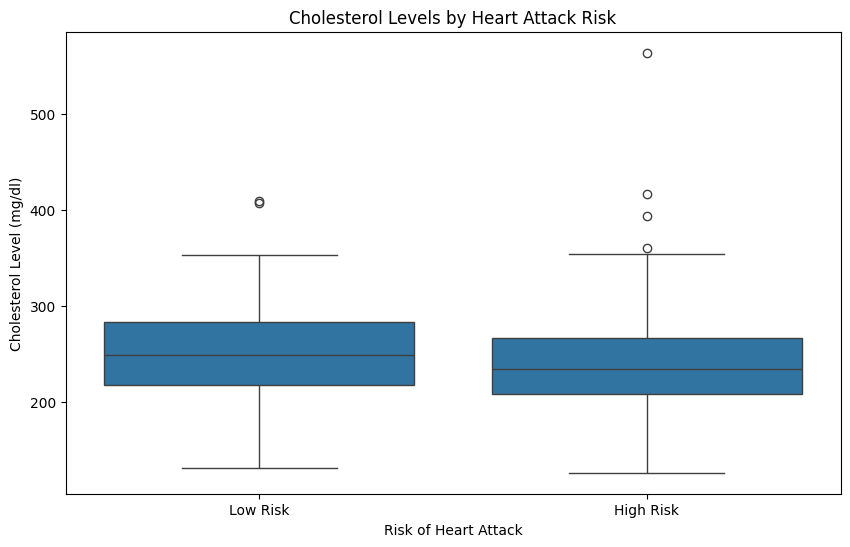

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='chol', data=data)

plt.title('Cholesterol Levels by Heart Attack Risk')
plt.xlabel('Risk of Heart Attack')
plt.ylabel('Cholesterol Level (mg/dl)')
plt.xticks([0, 1], ['Low Risk', 'High Risk'])
plt.show()

The boxplot graph shows that there are more outliers in individuals who have a higher risk of getting a heart attack. This shows that individuals with extremely high cholesterol levels tend to have a higher risk for heart attacks. All outliers fall above the majority. However, even though all outliers fall above the majority, the average/mean for individuals at high risk of heart attacks is lower compared to those at low risk, which may indicate that there are other factors beside cholesterol levels that influence the risk of heart attacks. In conclusion, from the boxplot graph, there is not a strong correlation between cholesterol level and risk of heart attacks, but extreme levels of high cholesterol increase the risk of heart attacks, as shown through the outliers.

## Resting Blood Pressure and Heart Attack Risk

Next, we examine whether resting blood pressure correlates with heart attack risk. We use histograms to compare the distribution of resting blood pressure in the low-risk and high-risk groups.

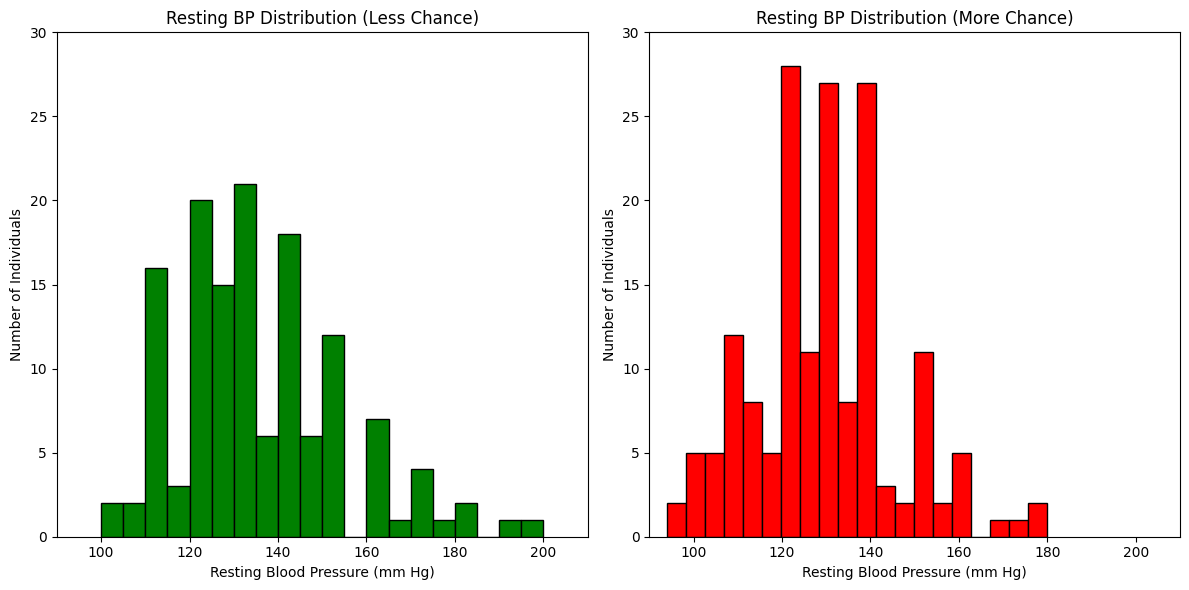

In [ ]:
less_chance_bp = data[data['output'] == 0]['trtbps']
more_chance_bp = data[data['output'] == 1]['trtbps']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(less_chance_bp, bins=20, color='green', edgecolor='black')
plt.title('Resting BP Distribution (Less Chance)')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Number of Individuals')
plt.xlim(90, 210)
plt.ylim(0, 30)

plt.subplot(1, 2, 2)
plt.hist(more_chance_bp, bins=20, color='red', edgecolor='black')
plt.title('Resting BP Distribution (More Chance)')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Number of Individuals')
plt.xlim(90, 210)
plt.ylim(0, 30)
plt.tight_layout()
plt.show()


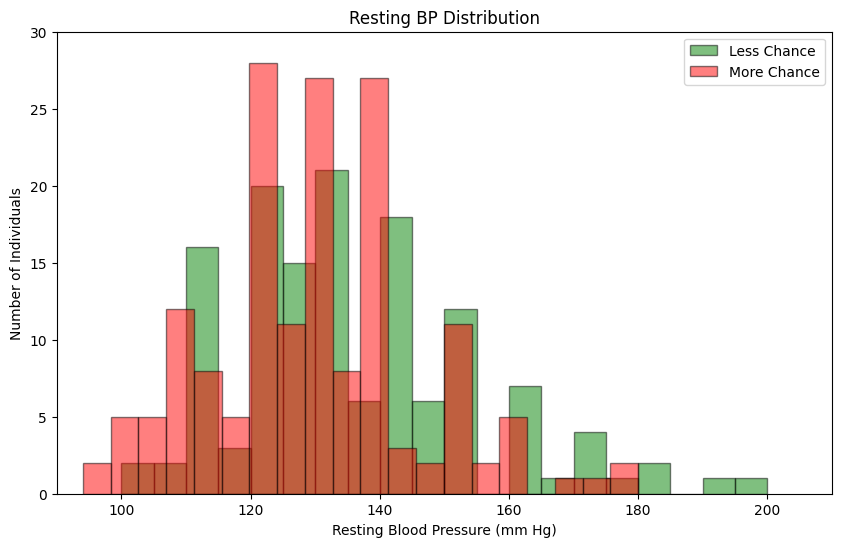

In [ ]:
less_chance_bp = data[data['output'] == 0]['trtbps']
more_chance_bp = data[data['output'] == 1]['trtbps']

plt.figure(figsize=(10, 6))

plt.hist(less_chance_bp, bins=20, color='green', alpha=0.5, label='Less Chance', edgecolor='black')
plt.hist(more_chance_bp, bins=20, color='red', alpha=0.5, label='More Chance', edgecolor='black')

plt.title('Resting BP Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Number of Individuals')
plt.xlim(90, 210)
plt.ylim(0, 30)
plt.legend()
plt.show()

The histograms suggest no clear correlation between resting blood pressure and heart attack risk. Individuals in both risk groups exhibit a wide range of blood pressure values. This analysis indicates that resting blood pressure alone might not be a strong predictor of heart attack risk.

## Chi-Squared Hypothesis Testing for Different Types of Chest Pain

To understand whether different types of chest pain (cp) are associated with heart attack risk, we use a Chi-squared hypothesis test. The null hypothesis (H0) is that chest pain type does not affect heart attack risk, while the alternative hypothesis (HA) suggests it does.

In [ ]:
cont_table = pd.crosstab(data['cp'],data['output'])
print(cont_table)

output    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


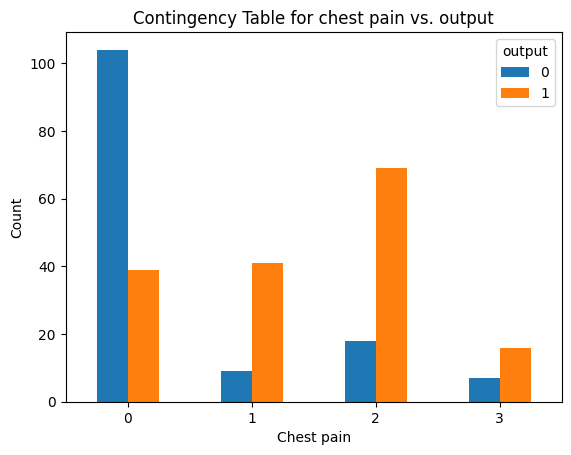

In [ ]:
cont_table.plot(kind='bar')
plt.title('Contingency Table for chest pain vs. output')
plt.xlabel('Chest pain')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='output', loc='upper right')
plt.show()

In [ ]:
chi2, p_value, dof, expected = chi2_contingency(cont_table)
print(f"P value:{p_value}")

P value:1.3343043373050064e-17


The Chi-squared test yields a p-value of approximately 1.3343043373050064e-17
 , indicating that we can reject the null hypothesis. This outcome suggests that different types of chest pain are indeed associated with heart attack risk. The contingency table and bar plot visually support this conclusion, showing that certain chest pain types are more prevalent in the high-risk group.



## Data Exploration Conclusion

The three features we explored in the Data Exploratory section was Cholesterol, Chest Pain types, and Resting Blood pressure. Through our analysis, we have discovered that chest pain types show a strong association with heart attack risk, making it a crucial factor to consider in further analysis. When it comes to cholesterol, we see a correlation between extreme outliers of cholesterol and the risk of a heart attack. Overall, however, the mean cholesterol level of the High-level group and low-level are comparable. This indicates that cholesterol level, although important, may not be the  primary predictor of heart attack risk. The histogram analysis for Resting Blood Pressure and heart attack risk indicates that there is no clear correlation between resting blood pressure and heart attack risk. Individuals in both the low and high-risk groups exhibit a broad range of resting blood pressures suggesting that this feature may not a good indicator of heart attack risk. However, through machine learning we may be able to find potential correlations between resting blood pressure and heart attack risk.


### Primary Analysis Technique of Choice

Given our insights, we will be choosing a classification technique. A classification technique will work best since our goal is to predict whether an individual is high or low-risk, a binary choice.

### Random Forest Classifier :

We will first get started by using a Random Forest Classifier. Before we get started, we will get our data prepped by selecting the features we care about which is Resting Blood Pressure, Cholesterol, and Chest Pain.

In [ ]:
selected_features = ['cp', 'chol', 'trtbps']
X = data[selected_features]
y = data['output']
X = pd.get_dummies(X, columns=['cp'])

**Note:** We also decided to apply one hot encoding to the chest pain feature due to it being a categorical variable.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8360655737704918


Our model has an accuracy of 0.836, which tells us that our model does a good job at identifying Heart Attack Risk! Let's dive deeper into our model's performance.

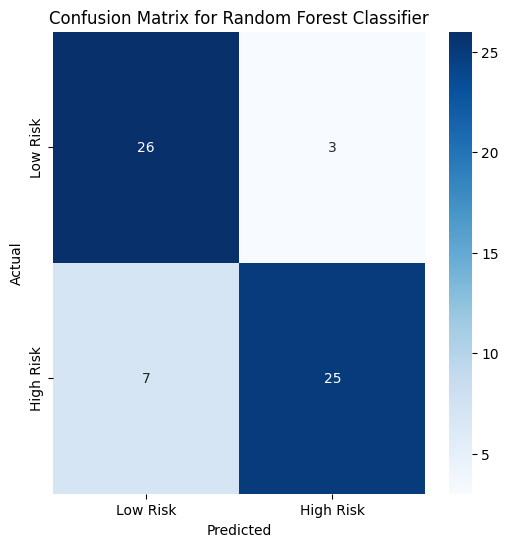

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk', 'High Risk'],
            yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### What are we looking at?
This confusion matrix provides us with a Visual Representation of how well our model is working. With the confusion matrix we can at a first glance get a good idea of how well our model is classifying the test data. Let's get a deeper dive and derive some key metrics such as Recall, F1-score, and precision. We can get these by generating a classification report.

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Classification Report Findings

Precision:
Class 0(Low Risk): 81%

Class 1(High Risk): 87%

Precision is a key metric measuring the proportion of correct positive predictions out of all predicted positives.The higher precision for "High Risk" (87%) indicates that when the model predicts a high-risk outcome, it's usually correct. This suggests that the model is conservative with its high-risk predictions. However, precision for "Low Risk" (81%) is slightly lower, suggesting some misclassification with more false positives.

Recall:

Class 0(Low Risk): 86%

Class 1(High Risk): 81%

Recall measures the proportion of correct positive predictions out of all actual positives. The recall for "Low Risk" is high (86%), suggesting that the model accurately identifies most low-risk cases. The slightly lower recall for "High Risk" (81%) indicates that the model might be missing some high-risk cases, resulting in false negatives.

F1-Score:

Class 0(Low Risk): 83%

Class 1(High Risk): 84%

F1-Score is the harmonic mean of both Recall and Precision. It balances both metrics giving us a good idea of the overall performance of the model's ability to classify correctly. The nearly identical F1-scores for both classes suggest that the model has a balanced performance in terms of precision and recall. This indicates that the model is effective in capturing both true positives and true negatives, with a reasonable trade-off between false positives and false negatives.

**Overall we have a balanced model capable of classifying with great accuracy.**

When it comes from a healthcare perspective it's important to understand which features have the biggest impact in deciding whether an individual has a high or low risk of getting a Heart Attack. We will now find out which Feature's in our model play the biggest role in classifying an individual into high or low risk for a heart attack.

<ipython-input-42-9a1fd0ad78c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


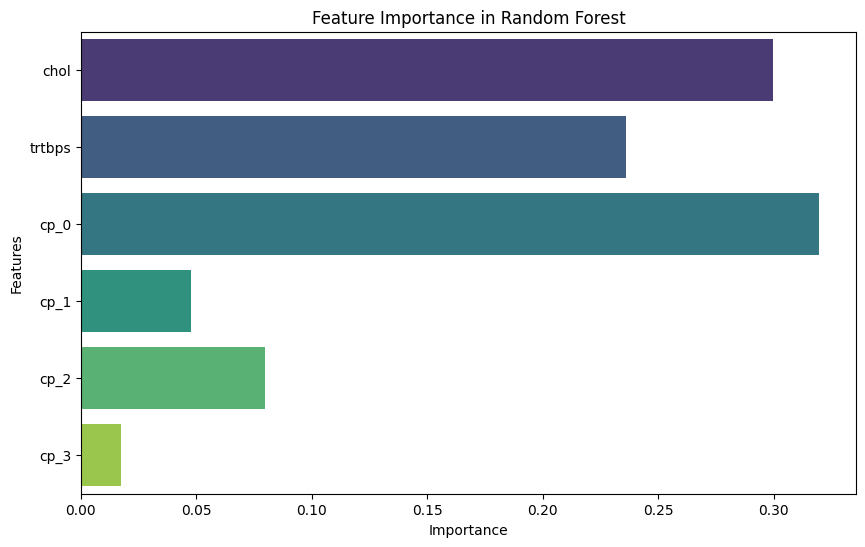

In [ ]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

### Features Importance

The three features which played a significant role in decision making are:

1.)cp_0 (Chest pain type: asymptomatic)

2.)Cholesterol

3.) trtbps (Resting Blood Pressure)

The first two features align with our data exploration as it was discovered in that section that cholesterol and Chest pain have a significant correlation in determining whether a patient is high or low risk. Through our Random Forest Classifier we also nailed down that the chest pain type, asymptomatic, has the most significance providing us with very important findings of what chest pain to be cautious of. While in the data exploration section, there seemed to be no significant correlation between Resting Blood Pressure and Heart Attack Risk. However, through feature importance analysis it has become clear that Resting Blood Pressure does play a large role in the classification process.

### Conclusion on Random Forest Classifier Analysis

Through the model's predictions, we can say with confidence that Cholesterol and Chest pain type play large roles when it comes to determining whether an individual is at risk of a Heart Attack. Our model has a balanced performance, a reflection of the F1-score of low and high risk being 85%, however, our model is slightly conservative when classifying high-risk individuals. Let's introduce another model into our analysis to help us uncover the uncertainty revolving around Resting Blood Pressure and also improve prediction accuracy when classifying individuals into High-risk.



### KNN:

KNN with 1 neighbors
Accuracy: 0.8524590163934426

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

KNN with 2 neighbors
Accuracy: 0.819672131147541

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61

KNN with 3 neighbors
Accuracy: 0.8688524590163934

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1    

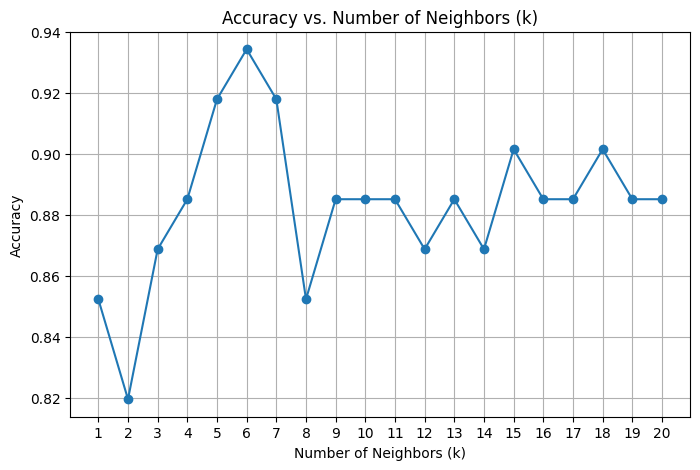

In [ ]:
X = data.drop(columns='output')
y = data['output']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

neighbors = range(1, 21)
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)


    y_pred = knn.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    class_report = classification_report(y_test, y_pred)

    print(f"KNN with {k} neighbors")
    print(f"Accuracy: {accuracy}\n")
    print(f"Classification Report:\n{class_report}")


plt.figure(figsize=(8, 5))
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.grid(True)
plt.xticks(neighbors)
plt.show()

Based off the graph above we see that there isn't any significant improvement in accuracy when increasing k past 6. So we will be using k=6 for our model.

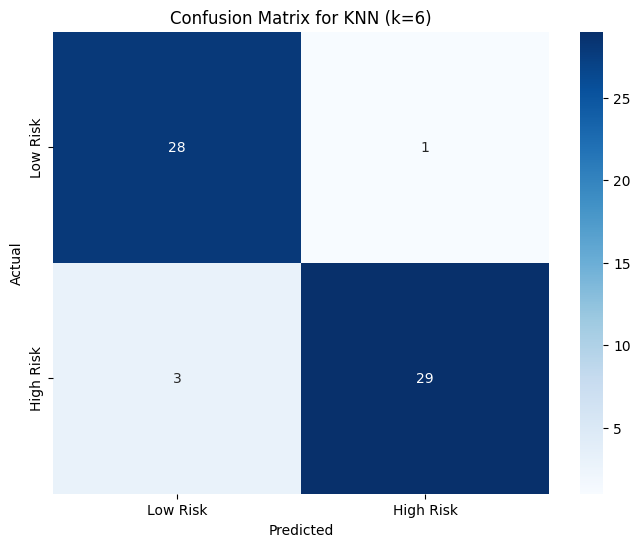

In [ ]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk', 'High Risk'],
            yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for KNN (k={k})')
plt.show()

### Conclusion on KNN Classifier Analysis

The K-Nearest Neighbors (KNN) algorithm proved to be highly effective in identifying individuals at risk of heart attack, especially when configured with k=6. This setting provided the best balance, ensuring the model captures most relevant patterns in the data without overfitting or underfitting. By comparing the similarities among data points, KNN efficiently classified patients into high or low heart attack risk categories.

The model's accuracy reached 93.4%, indicating strong overall predictive power. The classification report further highlighted:

Precision: The model's precision for high-risk patients was 97%, indicating that all predicted high-risk cases were accurately classified. For low-risk cases, the precision was 90%.

Recall: The recall was 97% for low-risk patients, showing that the model identified all actual low-risk cases. For high-risk cases, the recall was 91%.

F1-score: The balanced F1-score for low-risk was 93% and high-risk groups was 94%, reflecting the model's consistent and accurate predictions across both classes.

**We can now classify high-risk individuals with greater accuracy when compared to the Random Forest Classifier!!**



### Conclusion/Insights for Reader

a) Primary Characteristics of Individuals at Higher Risk of Heart Attacks\
**Chest Pain Type** (cp): Individuals experiencing atypical or asymptomatic chest pain (types 1, 2, and 3) are at a higher risk.\
**Cholesterol Levels** (chol): Higher cholesterol levels are associated with increased heart attack risk.\
**Exercise-Induced Angina** (exng): Positive exercise-induced angina is a notable indicator of higher risk.\
**Age**: Older individuals, particularly those above 60, are at higher risk.\
**Resting Blood Pressure** (trtbps): Higher resting blood pressure, while not directly conclusive on its own, contributes to a comprehensive risk profile when considered with other variables.

Our models, which used chest pain types, cholesterol levels, and resting blood pressure, show high accuracy (Random Forest w/ 84% and KNN w/ 93%), so we are confident that these characteristcs indicate risk of heart attack.

---

b) Differences in Health Metrics Between High and Low Heart Attack Risks\
**Cholesterol Levels**: High-risk individuals tend to have elevated cholesterol levels compared to low-risk individuals.\
**Resting Blood Pressure**: No significant difference in resting blood pressure is observed between high and low-risk individuals, indicating it's not a strong standalone predictor.\
**Maximum Heart Rate Achieved** (thalachh): Individuals at high risk often achieve lower maximum heart rates than those at low risk.\
**Oldpeak** (ST Depression): Individuals with higher values of ST depression tend to have a higher risk of heart attack.\
**Number of Major Vessels** (caa): The number of major vessels colored during fluoroscopy is a significant indicator, with higher counts typically seen in high-risk individuals.

---

c) Our models indicates whether an individual is at high risk for heart attack based on some of their characteristics. This information can be used to educate individuals on what the risks of heart attack may look like. It can also be used for early detection/prevention of heart attacks in the future.

---
An uninformed reader should get a better understanding of the different factors that come into play when figuring out who would have an increased risk of a heart attack. They will see that some factors alone aren't going to detect risk, but putting multiple variable through a model can give a higher detecting rate. An already informed reader will learn more about how accurate the model is at detecting risk and a more detailed look on the issue.